In [1]:
%run imports.py

Files already downloaded and verified
Preparing data..
Files already downloaded and verified
GPU available:  True
OS:  win32


In [2]:
test_batch_size = 100
c,w,h=3,32,32

In [3]:
#For epoch 160, azure

ms=[0,0.5,0.9,0.98]
sch="plateau"
tot=100000
step=10000
n_exp=5

bs=128
wd=5e-5

def inj_zero_plateau_epoch_160():

    for m in ms:
        print("Step: " + str(m))
        name="bs_"+str(bs) + "_sch_"+ sch + "_m_" + str(m)
        
        path="./checkpoints/"+ name
        path_best= path + "/"+name+"_epoch_160"

        model = model_actions.load(path_best)

        pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())

        res = many_inj.progressive_inj_zero(pfi_model,tot,step,n_exp=n_exp)

        save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_160"
        save_data={}
        save_data["avg"]=res[0]
        save_data["std"]=res[1]
        save_data["loss_avg"] = res[2]
        save_data["loss_std"] = res[3]
        utils.save(save_data,save_name)

In [4]:
az_manage_proc.run_and_delete(log.log_time,inj_zero_plateau_epoch_160)

Found existing instance, use it.
Logging time
Step: 0
Injection: 0 of 100000
Injection: 10000 of 100000
Injection: 20000 of 100000
Injection: 30000 of 100000
Injection: 40000 of 100000
Injection: 50000 of 100000


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Step: 0
Step: 0.5
Step: 0.9
Step: 0.98


Text(0, 0.5, 'Accuracy')

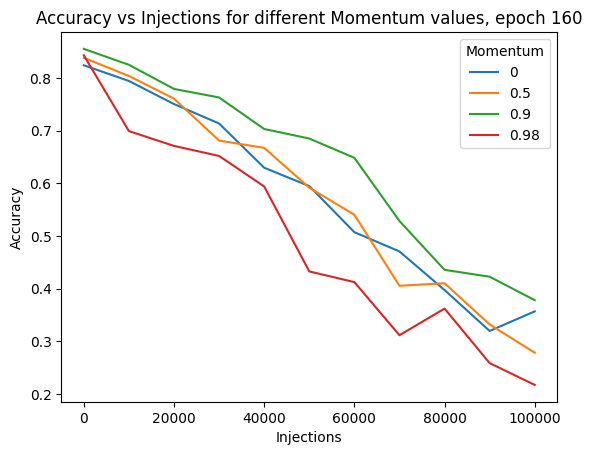

In [2]:
#Graphs for 100k injections, all epoch 160
ms=[0,0.5,0.9,0.98]
sch="plateau"
tot=100000
step=10000
n_exp=5
best_accs=[]
x=np.array(range(0,11))*step
bs=128

for m in ms:
    print("Step: " + str(m))
    name="bs_"+str(bs) + "_sch_"+ sch + "_m_" + str(m)

    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_160"
    loaded=utils.load(save_name + ".json")
    best_accs.append(loaded["avg"][0])
    plt.plot(x,loaded["avg"])

plt.title("Accuracy vs Injections for different Momentum values, epoch 160")
plt.legend(ms,title="Momentum")
plt.xlabel("Injections")
plt.ylabel("Accuracy")

In [7]:
#Same graph but with loss
wds=[0,5e-7,5e-5,5e-3]
sch="plateau"
tot=100000
step=10000
n_exp=5
best_accs=[]
x=np.array(range(0,11))*step
bs=128

for wd in wds:
    print("Inj for: " + str(wd))
    name = "bs_"+str(bs)+"_sch_"+sch + "_wd_"+str(wd)
    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_160"
    loaded=utils.load(save_name + ".json")
    best_accs.append(loaded["avg"][0])
    plt.plot(x,loaded["avg"])

plt.title("Accuracy vs Injections for different Weight decay values, epoch 160")
plt.legend(wds,title="Weight decay")
plt.xlabel("Injections")
plt.ylabel("Accuracy")

Inj for: 0


ValueError: x and y must have same first dimension, but have shapes (11,) and (1,)

In [8]:
    name = "bs_"+str(bs)+"_sch_"+sch + "_wd_"+str(0)
    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_160"
    loaded=utils.load(save_name + ".json")

In [ ]:
if 0:
    print("hello")